In [1]:
import json
import sys
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns


df_posts = pd.read_csv("../DATA/cleaned_posts.csv")
df_comments = pd.read_csv("../DATA/cleaned_comments.csv")

In [2]:
#Fixing typing from read_csv
df_posts['text'] = df_posts['text'].astype(str)
df_comments['text'] = df_comments['text'].astype(str)
print(df_posts.columns)

Index(['selftext', 'created_utc', 'ups', 'subreddit', 'link_flair_text',
       'title', 'text'],
      dtype='object')


In [3]:
#Import and download pretrained VADER model
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\brian\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [4]:
def add_sentiment_scores(df):
    # Initialize VADER SentimentIntensityAnalyzer
    sia = SentimentIntensityAnalyzer()

    #Ensure typing, removing empty strings
    df['text'] = df['text'].astype(str).str.strip()

    # Calculate sentiment scores and add to dataset
    df['compound_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['compound'])
    df['positive_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['pos'])
    df['negative_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neg'])
    df['neutral_sentiment_score'] = df['text'].apply(lambda x: sia.polarity_scores(x)['neu'])
    return df

#Calculate scores for both datasets
posts_scored = add_sentiment_scores(df_posts)
comments_scored = add_sentiment_scores(df_comments)


In [5]:
def filter_by_keyword(df, keyword):
    # Filter for posts/comments that contain the specified keyword (case insensitive)
    return df[df['text'].str.contains(keyword, case=False, na=False)]

posts_filtered = filter_by_keyword(posts_scored, 'biden')
comments_filtered = filter_by_keyword(comments_scored, 'biden')

In [6]:
posts_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,9.890000e+02,989.000000,989.000000,989.000000,989.000000,989.000000
mean,1.721478e+09,84.675430,0.047356,0.082413,0.076390,0.841185
std,2.658780e+05,325.855018,0.429822,0.117014,0.117899,0.153137
min,1.720915e+09,0.000000,-0.997600,0.000000,0.000000,0.244000
25%,1.721266e+09,1.000000,-0.202300,0.000000,0.000000,0.743000
50%,1.721521e+09,1.000000,0.000000,0.000000,0.000000,0.849000
75%,1.721660e+09,15.000000,0.340000,0.151000,0.140000,1.000000
max,1.722113e+09,4988.000000,0.999500,0.697000,0.660000,1.000000


In [7]:
comments_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,1.093400e+04,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000
mean,1.721476e+09,8.995336,0.079552,0.107372,0.089781,0.802845
std,2.788258e+05,39.755202,0.615735,0.086197,0.079944,0.105864
min,1.720915e+09,-175.000000,-0.999300,0.000000,0.000000,0.240000
25%,1.721269e+09,1.000000,-0.476700,0.046000,0.024000,0.739000
50%,1.721501e+09,2.000000,0.064400,0.098000,0.080000,0.804000
75%,1.721662e+09,6.000000,0.652850,0.153000,0.133000,0.870000
max,1.722124e+09,1567.000000,0.999300,0.737000,0.760000,1.000000


In [8]:
num_rows = posts_scored.shape[0]
print(f'Number of rows in posts_scored: {num_rows}')
num_rows = posts_filtered.shape[0]
print(f'Number of rows in posts_filtered: {num_rows}')
num_rows = comments_scored.shape[0]
print(f'Number of rows in comments_scored: {num_rows}')
num_rows = comments_filtered.shape[0]
print(f'Number of rows in comments_filtered: {num_rows}')


Number of rows in posts_scored: 6146
Number of rows in posts_filtered: 989
Number of rows in comments_scored: 80285
Number of rows in comments_filtered: 10934


In [9]:
comments_filtered.describe()

,created_utc,ups,compound_sentiment_score,positive_sentiment_score,negative_sentiment_score,neutral_sentiment_score
count,1.093400e+04,10934.000000,10934.000000,10934.000000,10934.000000,10934.000000
mean,1.721476e+09,8.995336,0.079552,0.107372,0.089781,0.802845
std,2.788258e+05,39.755202,0.615735,0.086197,0.079944,0.105864
min,1.720915e+09,-175.000000,-0.999300,0.000000,0.000000,0.240000
25%,1.721269e+09,1.000000,-0.476700,0.046000,0.024000,0.739000
50%,1.721501e+09,2.000000,0.064400,0.098000,0.080000,0.804000
75%,1.721662e+09,6.000000,0.652850,0.153000,0.133000,0.870000
max,1.722124e+09,1567.000000,0.999300,0.737000,0.760000,1.000000


In [10]:
#We did some investigation of some of the "True neutral" comments as a score of zero seemed erroneous
#These were just posts that were too short to contain any rich semantic information 
filtered = posts_scored[posts_scored['compound_sentiment_score'] == 0.0]
print(filtered[['compound_sentiment_score', 'positive_sentiment_score', 'negative_sentiment_score', 'neutral_sentiment_score']])

      compound_sentiment_score  positive_sentiment_score  \
3                          0.0                       0.0   
4                          0.0                       0.0   
5                          0.0                       0.0   
6                          0.0                       0.0   
7                          0.0                       0.0   
...                        ...                       ...   
6137                       0.0                       0.0   
6140                       0.0                       0.0   
6143                       0.0                       0.0   
6144                       0.0                       0.0   
6145                       0.0                       0.0   

      negative_sentiment_score  neutral_sentiment_score  
3                          0.0                      1.0  
4                          0.0                      1.0  
5                          0.0                      1.0  
6                          0.0                 

In [11]:
#first, I'll tackle the posts

#so, biden posted his dropping out on twitter at 1:46 pm EST 
#in UTC, this time is: 1:46 PM - 4 hours = 9:46 PM UTC on July 21.

from datetime import datetime
import pytz

# Define the UTC time for 5:46 PM on July 21, 2023
utc_time = datetime(2024, 7, 21, 17, 46, 0, tzinfo=pytz.utc)  # 17:46 is 5:46 PM

#now we can get the unix timestamp which is what our data uses to identify when tweets were made
unix_timestamp = int(utc_time.timestamp())
print(unix_timestamp)
#the timestamp for Biden's twitter post is 1721598360. Any UTC below this indicates a tweet
#before the announcement, and any UTC above indicates a tweet after the announcement


df_before = pd.DataFrame()
df_after = pd.DataFrame()

def before_after_dropout_dataframes(a_dataframe):
    """
    This function creates two new dataframes each respectively containing posts from before and after Biden's dropout announcement
    based on his UTC time of dropout we found already.
    """
    global df_after, df_before

    df_before = a_dataframe[a_dataframe["created_utc"] < 1721583960].copy()
    df_after = a_dataframe[a_dataframe["created_utc"] >= 1721598360].copy()



df_before_dem = pd.DataFrame()
df_after_dem = pd.DataFrame()

df_before_rep = pd.DataFrame()
df_after_rep = pd.DataFrame()

df_before_PD = pd.DataFrame()
df_after_PD = pd.DataFrame()



def seperate_by_party(before_df, after_df):
    """
    This function creates several new dataframes each respectively containing posts from the corresponding subreddits
    """
    global df_before_dem, df_after_dem, df_before_rep, df_after_rep, df_before_PD, df_after_PD

    df_before_dem = before_df[before_df["subreddit"] == "democrats"].copy()
    df_after_dem = after_df[after_df["subreddit"] == "democrats"].copy()

    df_before_rep = before_df[before_df["subreddit"] == "Republican"].copy()
    df_after_rep = after_df[after_df["subreddit"] == "Republican"].copy()

    df_before_PD = before_df[before_df["subreddit"] == "PoliticalDiscussion"].copy()
    df_after_PD = after_df[after_df["subreddit"] == "PoliticalDiscussion"].copy()


before_after_dropout_dataframes(posts_filtered) #run this BEFORE seperate_by_party()
seperate_by_party(df_before, df_after)


def ttest(dataframe1, dataframe2):
    """A t-test using compound sentiment score to see if the change in sentiment is statistically significant
    """
    from scipy.stats import ttest_ind
    
    g1 = dataframe1["compound_sentiment_score"]
    g2 = dataframe2["compound_sentiment_score"]

    # Perform the t-test
    t_statistic, p_value = ttest_ind(g1, g2)

    return t_statistic, p_value


1721583960


In [12]:
#Now let's perform t-tests on the compound sentiments for the POSTS for each political subreddit

dem_post_ttest = ttest(df_before_dem, df_after_dem)

rep_post_ttest = ttest(df_before_rep, df_after_rep)

PD_post_ttest = ttest(df_before_PD, df_after_PD)

print(f"Sentiment t-test statistics for the democrats subreddit: T-statistic: {dem_post_ttest[0]}, P-value: {dem_post_ttest[1]}")
print(f"Sentiment t-test statistics for the Republican subreddit: T-statistic: {rep_post_ttest[0]}, P-value: {rep_post_ttest[1]}")
print(f"Sentiment t-test statistics for the PoliticalDiscussion subreddit: T-statistic: {PD_post_ttest[0]}, P-value: {PD_post_ttest[1]}")

Sentiment t-test statistics for the democrats subreddit: T-statistic: -0.18769776861679455, P-value: 0.8512097164028811
Sentiment t-test statistics for the Republican subreddit: T-statistic: 0.4576751932220733, P-value: 0.6476235706301625
Sentiment t-test statistics for the PoliticalDiscussion subreddit: T-statistic: -1.5855714800727285, P-value: 0.11424095694942944


In [13]:
#Now we will make dataframes for the comments and subsequently find their t-statistics

df_comment_after = pd.DataFrame()
df_comment_before = pd.DataFrame()

def before_after_dropout_comment_dataframes(a_comment_dataframe):
    """
    This function creates two new dataframes each respectively containing comments from before and after Biden's dropout announcement
    based on his UTC time of dropout we found already.
    """
    global df_comment_after, df_comment_before

    df_comment_before = a_comment_dataframe[a_comment_dataframe["created_utc"] < 1721583960].copy()
    df_comment_after = a_comment_dataframe[a_comment_dataframe["created_utc"] >= 1721598360].copy()



before_after_dropout_comment_dataframes(comments_filtered)


df_comment_before_dem = pd.DataFrame()
df_comment_after_dem = pd.DataFrame()

df_comment_before_rep = pd.DataFrame()
df_comment_after_rep = pd.DataFrame()

df_comment_before_PD = pd.DataFrame()
df_comment_after_PD = pd.DataFrame()


def seperate_comments_by_party(before_comment_df, after_comment_df):
    """
    This function creates several new dataframes each respectively containing comments from the corresponding subreddits
    """
    global df_comment_before_dem, df_comment_after_dem, df_comment_before_rep, df_comment_after_rep, df_comment_before_PD, df_comment_after_PD

    df_comment_before_dem = before_comment_df[before_comment_df["subreddit"] == "democrats"].copy()
    df_comment_after_dem = after_comment_df[after_comment_df["subreddit"] == "democrats"].copy()

    df_comment_before_rep = before_comment_df[before_comment_df["subreddit"] == "Republican"].copy()
    df_comment_after_rep = after_comment_df[after_comment_df["subreddit"] == "Republican"].copy()

    df_comment_before_PD = before_comment_df[before_comment_df["subreddit"] == "PoliticalDiscussion"].copy()
    df_comment_after_PD = after_comment_df[after_comment_df["subreddit"] == "PoliticalDiscussion"].copy()

seperate_comments_by_party(df_comment_after, df_comment_before)


In [14]:
#Now we do the t-tests for the comments in each subreddit

dem_comment_ttest = ttest(df_comment_before_dem, df_comment_after_dem)

rep_comment_ttest = ttest(df_comment_before_rep, df_comment_after_rep)

PD_comment_ttest = ttest(df_comment_before_PD, df_comment_after_PD)

print(f"Sentiment t-test statistics for the democrats subreddit: T-statistic: {dem_comment_ttest[0]}, P-value: {dem_comment_ttest[1]}")
print(f"Sentiment t-test statistics for the Republican subreddit: T-statistic: {rep_comment_ttest[0]}, P-value: {rep_comment_ttest[1]}")
print(f"Sentiment t-test statistics for the PoliticalDiscussion subreddit: T-statistic: {PD_comment_ttest[0]}, P-value: {PD_comment_ttest[1]}")

Sentiment t-test statistics for the democrats subreddit: T-statistic: 5.262430303507806, P-value: 1.5580719024135326e-07
Sentiment t-test statistics for the Republican subreddit: T-statistic: -0.49501670298273087, P-value: 0.6207061448726928
Sentiment t-test statistics for the PoliticalDiscussion subreddit: T-statistic: 4.976674121177761, P-value: 6.633847775331306e-07


In [23]:
def plot_average_sentiment(posts_df, text_type):
    # Calculate the average sentiment score per subreddit
    average_sentiment = posts_df.groupby('subreddit')['compound_sentiment_score'].mean().reset_index()

    ordered_subreddits = ['democrats', 'Republican', 'PoliticalDiscussion'] #Array to order subreddits consistently

    # Create a bar plot for average sentiment
    plt.figure(figsize=(10, 6))
    sns.barplot(
        x='subreddit', 
        y='compound_sentiment_score', 
        data=average_sentiment, 
        palette=['#99CCFF', '#FF9999', '#D3D3D3'],  # Blue, Red, Grey 
        order=ordered_subreddits)
    
    plt.axhline(0, color='black', linewidth=1, linestyle='--')

    # Add titles and labels
    plt.title('Average Sentiment Score of ' + text_type+ ' per Subreddit', fontsize=16)

    plt.xlabel('Subreddit', fontsize=14)
    plt.ylabel('Average Sentiment Score', fontsize=14)
    plt.xticks(rotation=45)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


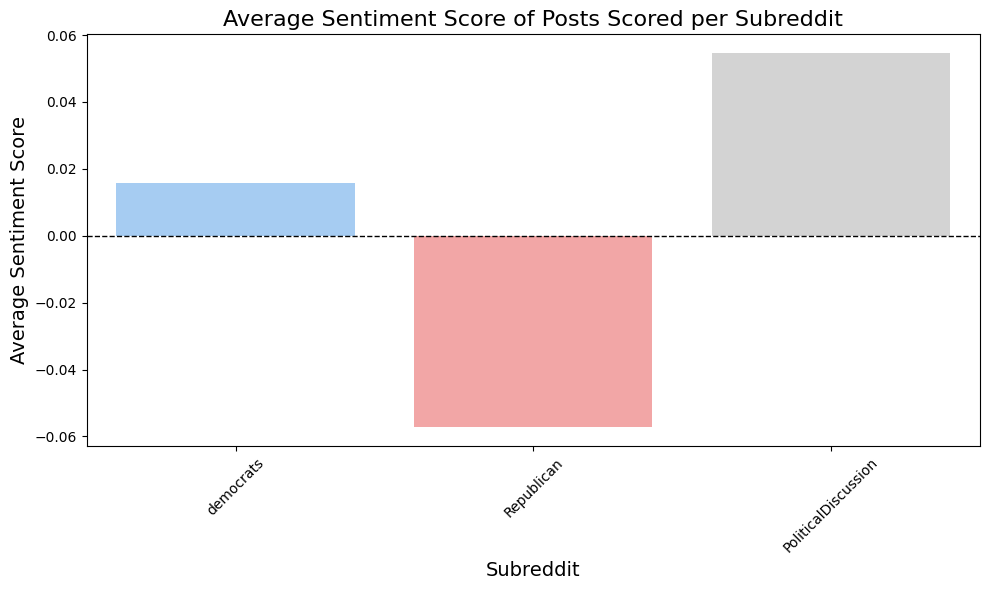

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


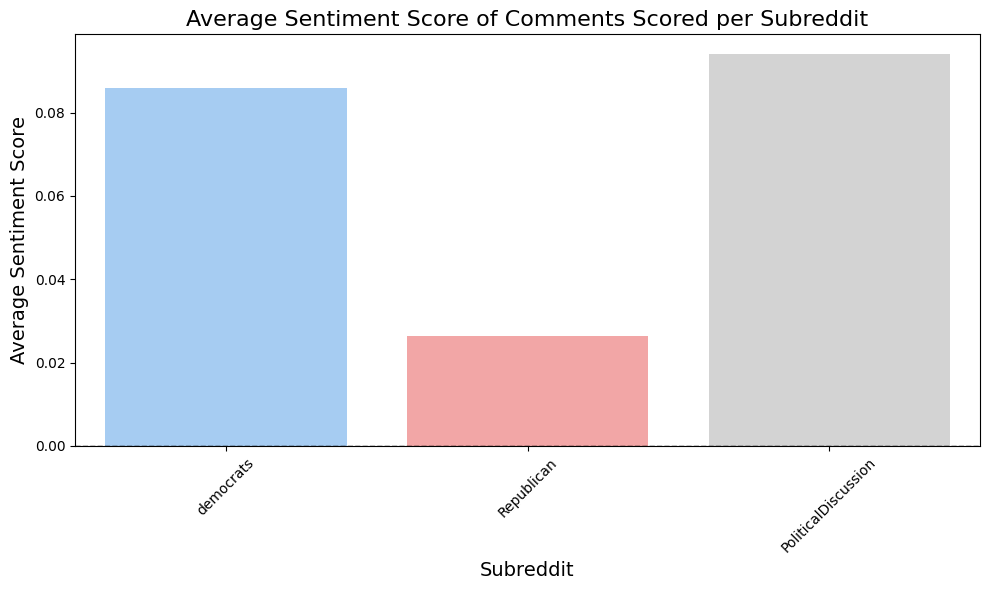

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


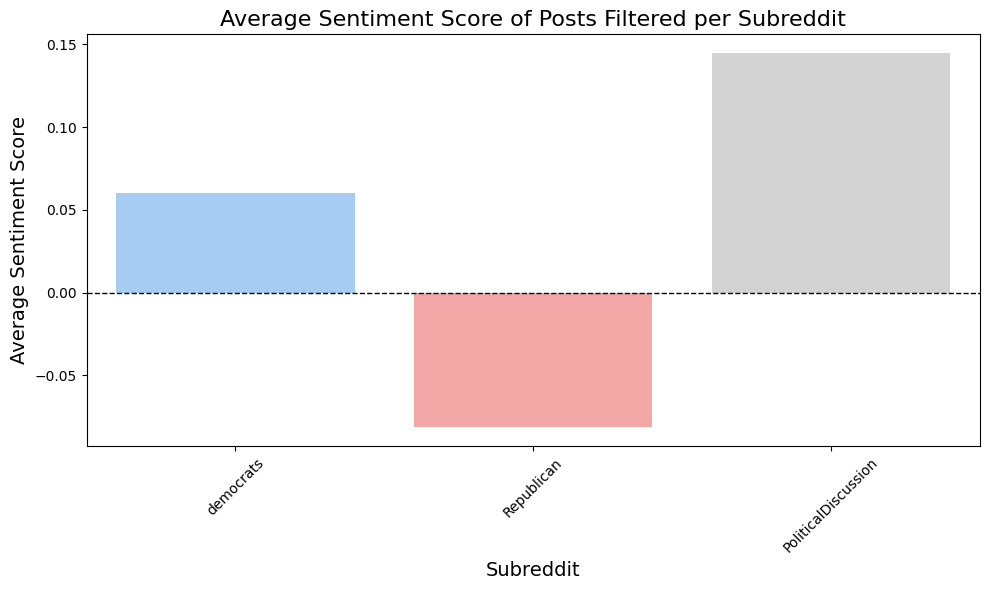

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


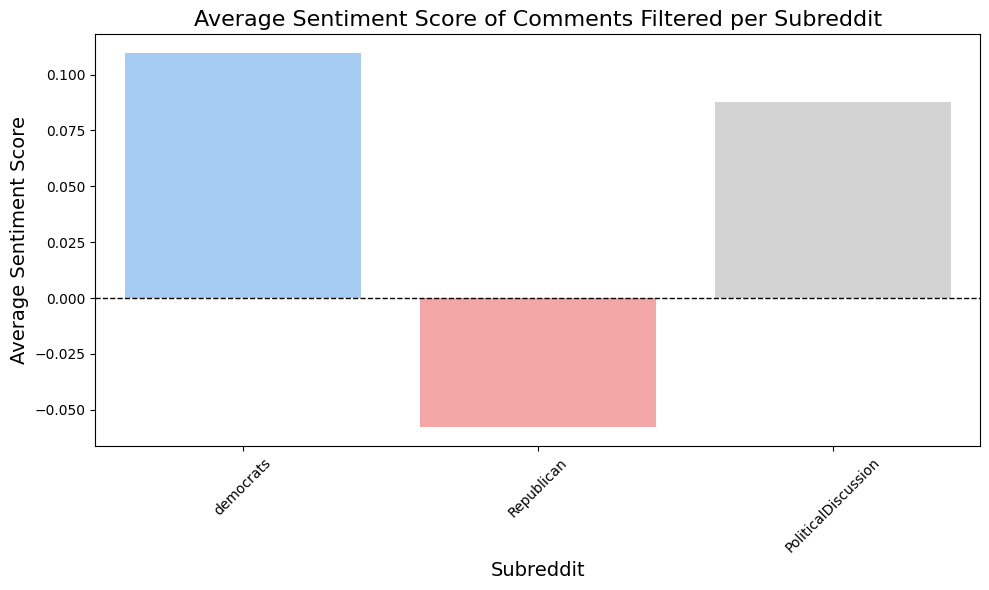

In [24]:
#plot_average_sentiment(all_post)
plot_average_sentiment(posts_scored, "Posts Scored")
plot_average_sentiment(comments_scored, "Comments Scored")

plot_average_sentiment(posts_filtered, "Posts Filtered")
plot_average_sentiment(comments_filtered, "Comments Filtered")

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


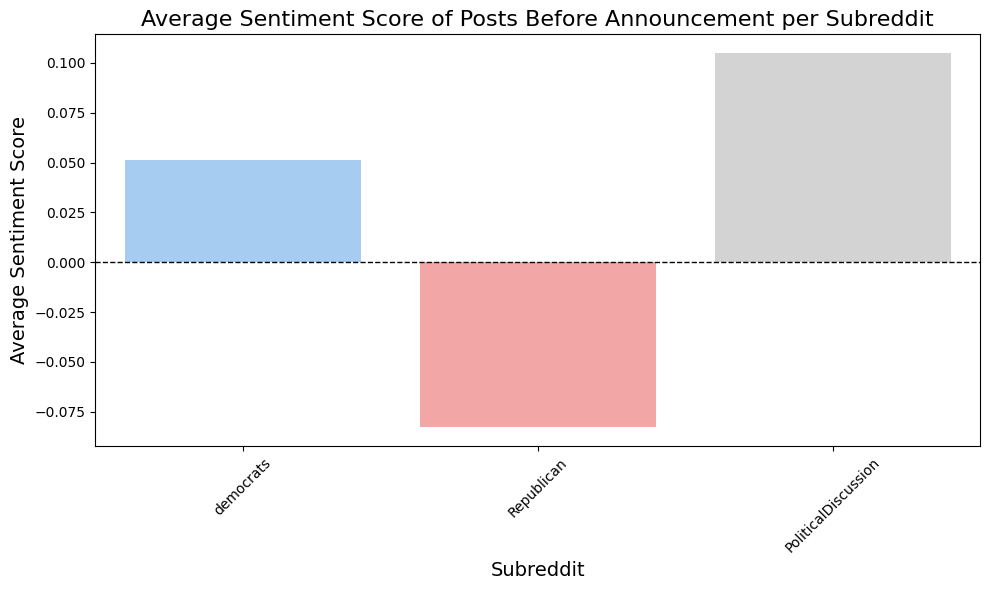

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


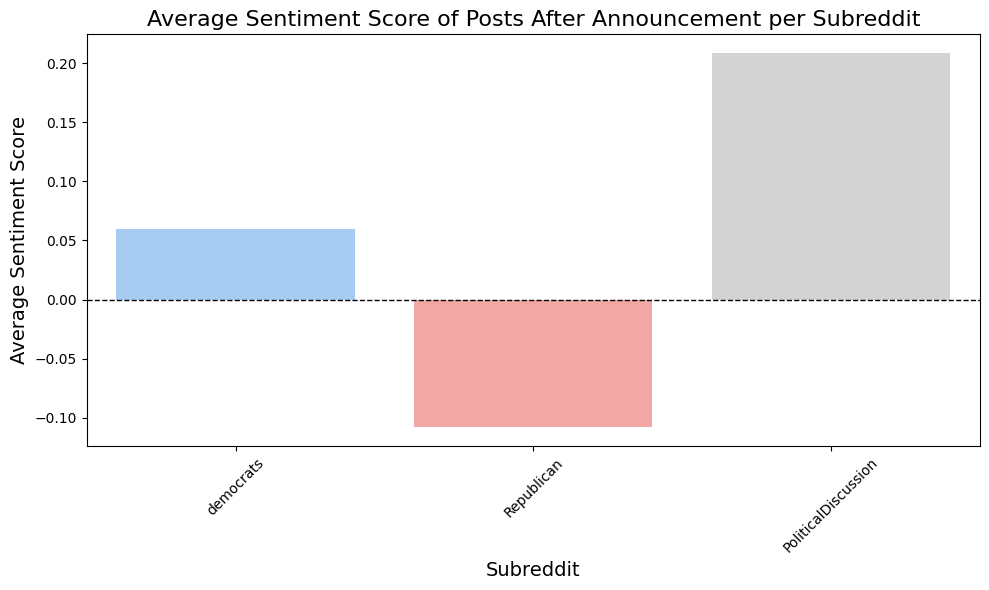

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


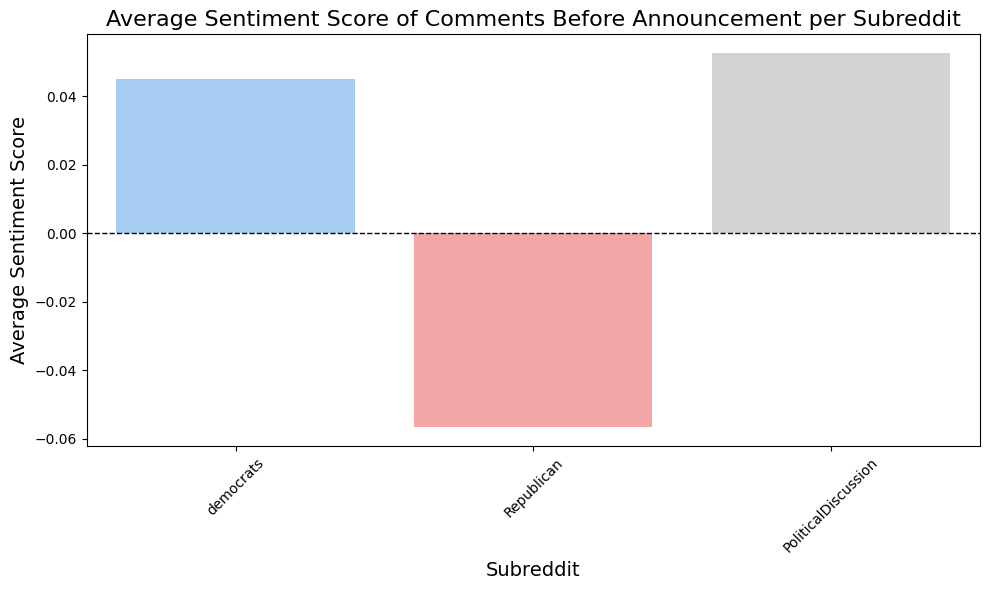

C:\Users\brian\AppData\Local\Temp\ipykernel_23824\2709067067.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


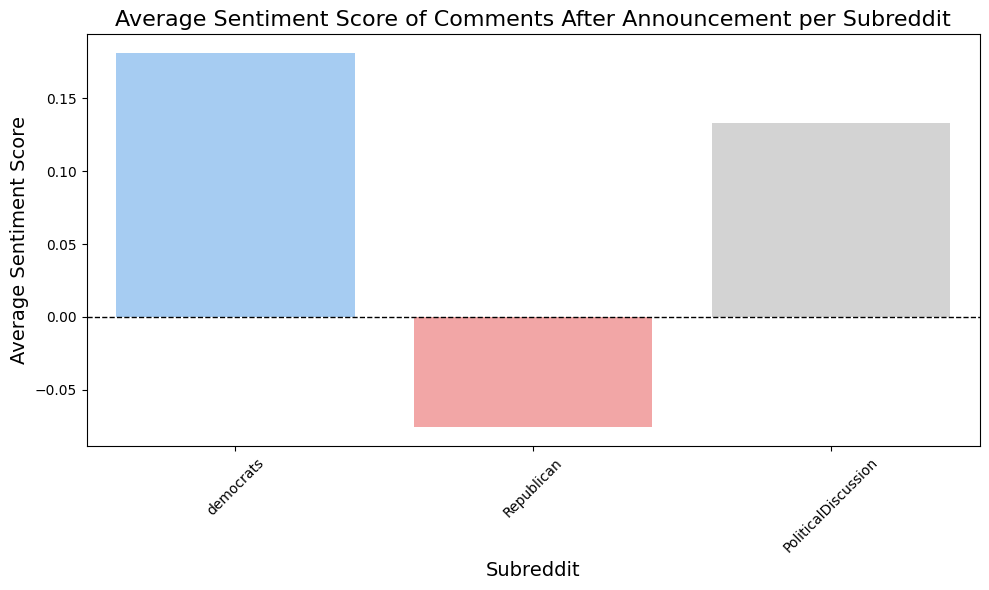

In [25]:
plot_average_sentiment(df_before, "Posts Before Announcement")
plot_average_sentiment(df_after, "Posts After Announcement")

plot_average_sentiment(df_comment_before, "Comments Before Announcement")
plot_average_sentiment(df_comment_after, "Comments After Announcement")

